In [4]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np 
import random

#np.random.seed(42)
#random.seed(42)

X, y = make_moons(n_samples=200, noise=0.15,  random_state=42)

print(X.shape)
print(y.shape)

a, b = np.split(X, 2, axis=1)

df = pd.DataFrame({"A": a.squeeze(), "B":b.squeeze(), "c":y})
df.head()

(200, 2)
(200,)


,A,B,c
0,-1.078161,0.063368,0
1,0.939809,0.457119,0
2,0.695151,0.642107,0
3,1.150173,-0.347871,1
4,0.249173,-0.068544,1


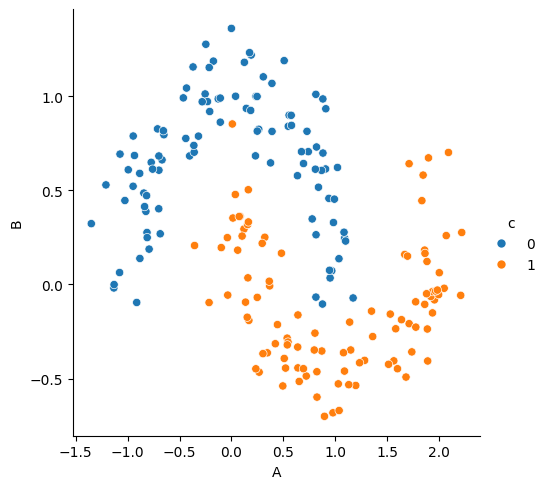

In [5]:
import seaborn as sns

sns.relplot(data=df,x="A", y="B", hue="c")

## Sklearn NN

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


net = MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=20, solver="sgd")
net.fit(X_train, y_train)
print(net.loss_)
print(net.t_) 


0.7530490534500026
3000


c:\Users\User\Desktop\projects\Micrograd\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
X_train.shape

(150, 2)

In [8]:
net.out_activation_

'logistic'

## MicroGrad

In [9]:
epochs = 20
learing_rate = 0.001
batch_size = 32



#andom.seed(42)
#np.random.seed(42)

def log_loss(y, p):
    return (y * p.log() + (1 - y)* (1-p).log()) * -1

def accuracy(y_true, y_pred):
    accum = 0 
    y_p_transfrom = [1 if i.data >= 0.5 else 0  for i in y_pred]

    for y_t, y_p in zip(y_true, y_p_transfrom):
        if y_t == y_p:
            accum+=1
    
    return accum / len(y_true)

In [10]:
from nn import MLP 
from functools import reduce 

# Need to create a NN with 16 * 16 hiden layers
# need to look at batch sizes 

net = MLP(2, [(16, "relu"), (16, "relu"), (1, "sigmoid")])


for epoch in range(epochs):

    total_loss = 0
    total_ava = 0

    for i in range(0, len(X_train), batch_size):
        x_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        y_preds = [net(i) for i in x_batch]

        total_ava += accuracy(y_batch, y_preds)


        # log loss function 
        loss = sum([log_loss(x, y) for x, y in zip(y_batch, y_preds)]) / len(y_batch)

        total_loss += loss.data
        
        #loss += reduce(lambda v1, v2: abs(v1) + abs(v2), net.parameters()) # L1 Lasso
 

        net.zero_grad() # making the gradiants zero

        loss.backward()

        for i in net.parameters():
            i.data = i.data - (i.grad * learing_rate) # graidient descent
    
    total_loss = total_loss / (len(X_train) // batch_size)
    total_ava = total_ava / (len(X_train) // batch_size)
    print(f"{epoch=}, loss {total_loss} Accuracy: {total_ava*100}%")


test_pred = [net(i) for i in X_test]
test_loss = sum([log_loss(x, y) for x, y in zip(y_test, test_pred)]) / len(y_test)
test_accuracy = accuracy(y_test, test_pred)
print(f"Test Loss: {test_loss} Accuracy: {test_accuracy}")

epoch=0, loss 2.869677773516229 Accuracy: 60.29829545454546%
epoch=1, loss 2.784398666107025 Accuracy: 60.29829545454546%
epoch=2, loss 2.701672831155452 Accuracy: 60.29829545454546%
epoch=3, loss 2.621342395284822 Accuracy: 60.29829545454546%
epoch=4, loss 2.5436273476851095 Accuracy: 60.29829545454546%
epoch=5, loss 2.4684846241228544 Accuracy: 60.29829545454546%
epoch=6, loss 2.395834680887732 Accuracy: 60.29829545454546%
epoch=7, loss 2.3257148706662285 Accuracy: 60.29829545454546%
epoch=8, loss 2.2581079469983774 Accuracy: 60.29829545454546%
epoch=9, loss 2.192749170509548 Accuracy: 60.29829545454546%
epoch=10, loss 2.129465118853367 Accuracy: 60.29829545454546%
epoch=11, loss 2.0682748416382477 Accuracy: 60.29829545454546%
epoch=12, loss 2.0090961603978847 Accuracy: 60.29829545454546%
epoch=13, loss 1.952007523826965 Accuracy: 60.29829545454546%
epoch=14, loss 1.8969097254136345 Accuracy: 60.29829545454546%
epoch=15, loss 1.8436636577635153 Accuracy: 60.29829545454546%
epoch=16, 

In [11]:
# Adding momentum
momentum = 0.5


net = MLP(2, [(16, "relu"), (16, "relu"), (1, "sigmoid")])
param_size = net.param_size()

velocity = [0] * param_size 

for epoch in range(epochs):
    # the default batch size is 200 in the MLPclassfication function 
    # so i am not going to chang it since my data only has a size of 150

    total_loss = 0
    total_ava = 0

    for i in range(0, len(X_train), batch_size):
        x_batch = X_train[i:min(i + batch_size, len(y_train))]
        y_batch = y_train[i:min(i + batch_size, len(y_train))]


        y_preds = [net(i) for i in x_batch]

        total_ava += accuracy(y_batch, y_preds)


        # log loss function 
        loss = sum([log_loss(x, y) for x, y in zip(y_batch, y_preds)]) / len(y_batch)

        total_loss += loss.data
        #loss += reduce(lambda v1, v2: abs(v1) + abs(v2), net.parameters()) # L1 Lasso
        


        net.zero_grad() # making the gradiants zero

        loss.backward()


        updates = [
            momentum * v - learing_rate * p.grad
            for p, v in zip(net.parameters(), velocity)
        ]

        velocity = updates

        for p, v in zip(net.parameters(), velocity):
            p.data += v
    
    total_loss = total_loss/ (len(X_train) // batch_size)
    total_ava = total_ava / (len(X_train) // batch_size)


    print(f"{epoch=}, loss {total_loss} Accuracy: {total_ava*100}%")


test_pred = [net(i) for i in X_test]
test_loss = sum([log_loss(x, y) for x, y in zip(y_test, test_pred)]) / len(y_test)
test_accuracy = accuracy(y_test, test_pred)
print(f"Test Loss: {test_loss} Accuracy: {test_accuracy}")

epoch=0, loss 2.663842067913742 Accuracy: 60.29829545454546%
epoch=1, loss 2.4825385300178446 Accuracy: 60.29829545454546%
epoch=2, loss 2.295815888176617 Accuracy: 60.29829545454546%
epoch=3, loss 2.1180997317817485 Accuracy: 60.29829545454546%
epoch=4, loss 1.9495147077371262 Accuracy: 60.29829545454546%
epoch=5, loss 1.7900354977697086 Accuracy: 60.29829545454546%
epoch=6, loss 1.6402517744862084 Accuracy: 60.29829545454546%
epoch=7, loss 1.5007888772874938 Accuracy: 60.29829545454546%
epoch=8, loss 1.372454399271742 Accuracy: 60.29829545454546%
epoch=9, loss 1.2558867070884452 Accuracy: 60.29829545454546%
epoch=10, loss 1.1513026775650927 Accuracy: 60.29829545454546%
epoch=11, loss 1.0591500833156813 Accuracy: 60.29829545454546%
epoch=12, loss 0.9795569979270087 Accuracy: 60.29829545454546%
epoch=13, loss 0.9121086416929504 Accuracy: 60.29829545454546%
epoch=14, loss 0.8564845907945806 Accuracy: 60.29829545454546%
epoch=15, loss 0.8120331822527778 Accuracy: 60.29829545454546%
epoch